# Prediction of salinity  using multiple regression model

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('bottle.csv', low_memory=False)
df=pd.DataFrame(data)

df_imp= df[['Depthm','T_degC', 'Salnty']].copy()
df_imp.tail(10)

df_imp.dropna(inplace=True)

df_imp.isna().sum()


Depthm    0
T_degC    0
Salnty    0
dtype: int64

**Since our dataset is big, 864k+ rows, we sample small amount of data to run our model on**

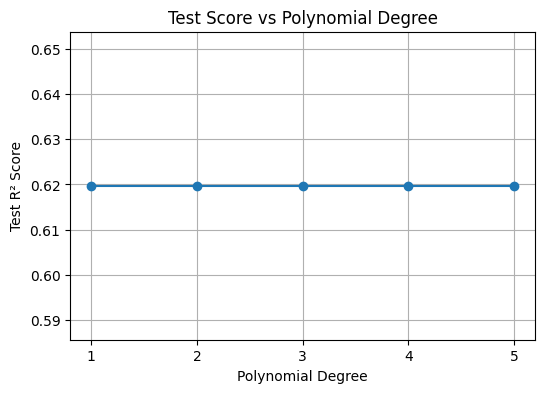

In [3]:

x= df_imp[['Depthm','T_degC']] #features
y= df_imp['Salnty'] #target

X_sample= x.sample(20000, random_state=42)
y_sample= y.loc[X_sample.index] # making sure y matches x in the dataframe

X_train, X_test, y_train, y_test= train_test_split(X_sample,y_sample, test_size=0.2, random_state=42)

max_degree=5
test_score=[]

for d in range(1,max_degree+1):

    poly=PolynomialFeatures(degree=2)

    X_train_poly= poly.fit_transform(X_train) #transforming the features 
    X_test_poly= poly.fit_transform(X_test)

    model= LinearRegression() #selecting the model

    model.fit(X_train_poly, y_train)

    y_predict= model.predict(X_test_poly)

    r2=r2_score(y_test,y_predict)
    test_score.append(r2)

plt.figure(figsize=(6,4))
plt.plot(range(1, max_degree+1), test_score, marker='o', linestyle='-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test R² Score')
plt.title('Test Score vs Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()





# Conclusion: The R2 score on this dataset jumps to 0.61 from 0.30 after introducing polynomial features and tweaking the degrees. the features in dataset is limited to increase the model performance even further hence this can be concluded as the highest score the model can go in a linear regressive algorithm.